<a href="https://www.kaggle.com/code/bhargavichintalapati/ass3-mobileprice-segmentation-classification?scriptVersionId=108142835" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#For data review
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for listing the directory
import os,time

# for printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Preprocessong:
from sklearn.preprocessing import StandardScaler
#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [3]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree
# For plotting Decision Tree
from sklearn.tree import plot_tree

In [4]:
# conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [5]:
print(os.listdir("../input/mobile-price-classification"))
mp = pd.read_csv('../input/mobile-price-classification/train.csv', low_memory = False);

['train.csv', 'test.csv']


In [6]:
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
mp.shape

(2000, 21)

In [8]:
mp.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
mp['price_range'].unique()

array([1, 2, 3, 0])

In [12]:
mp['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [13]:
mp['battery_power'].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

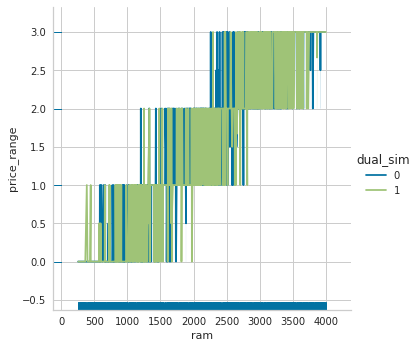

In [14]:
#relation between price and ram
sns.relplot(kind='line',data=mp, x='ram',y='price_range', hue='dual_sim');
sns.rugplot(data=mp, x='ram',y='price_range');

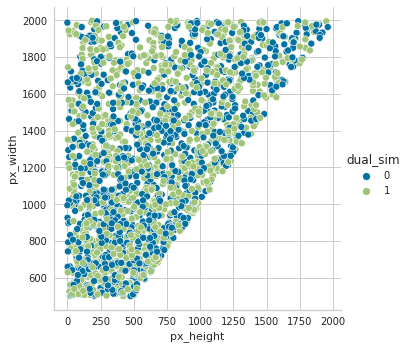

In [15]:
sns.relplot(kind='scatter',data=mp, x='px_height',y='px_width', hue='dual_sim');

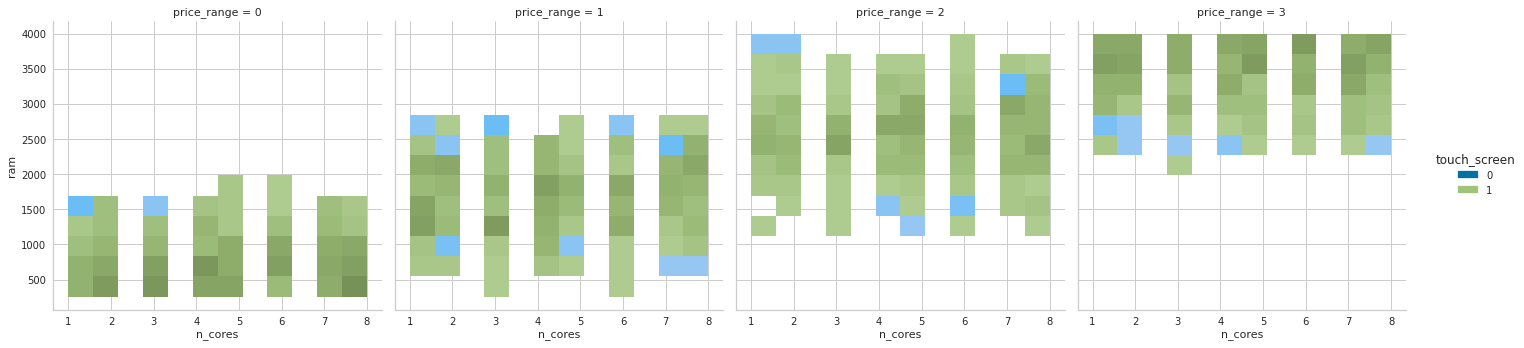

In [16]:
sns.displot(kind='hist',data=mp, x='n_cores', y='ram', hue='touch_screen', col='price_range');

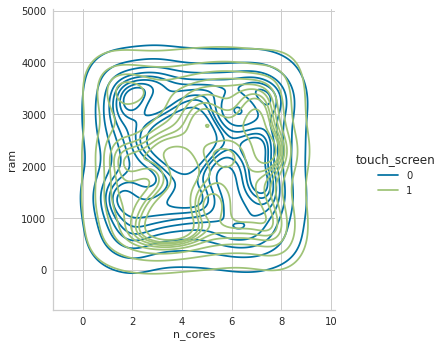

In [17]:
sns.displot(kind='kde',data=mp, x='n_cores', y='ram', hue='touch_screen');

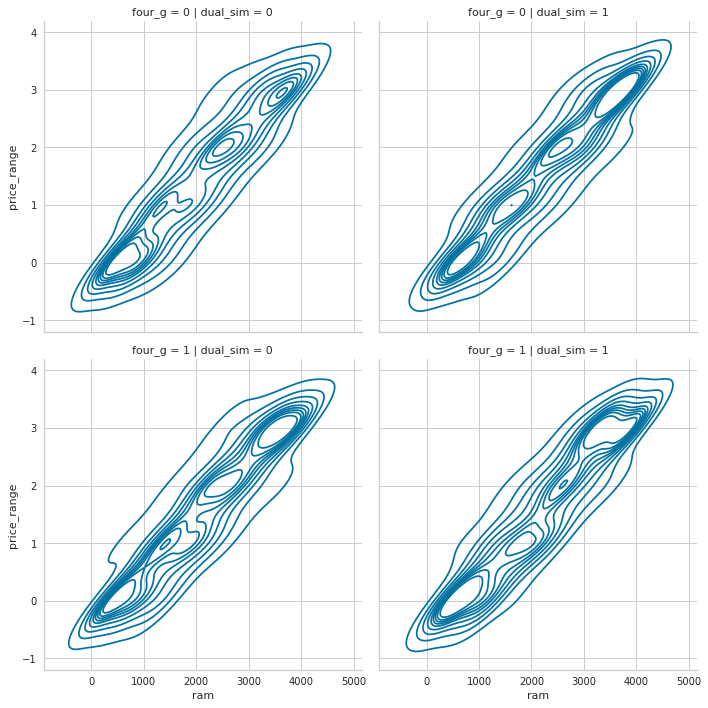

In [18]:
sns.displot(kind='kde',
    data=mp,x='ram', y="price_range", col="dual_sim", row="four_g"
);

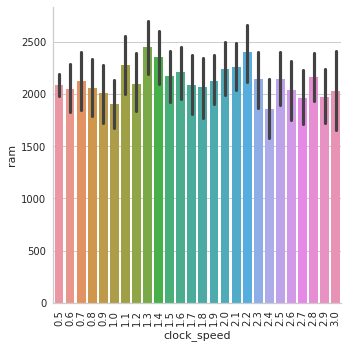

In [19]:
plot = sns.catplot(kind='bar',data=mp, x='clock_speed', y='ram');
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

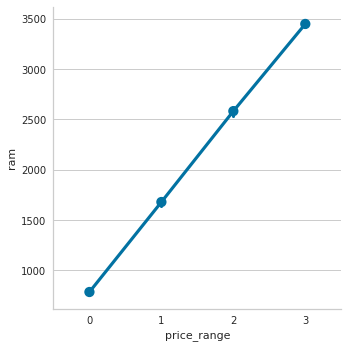

In [20]:
sns.catplot(kind='point',data=mp, x='price_range', y='ram');

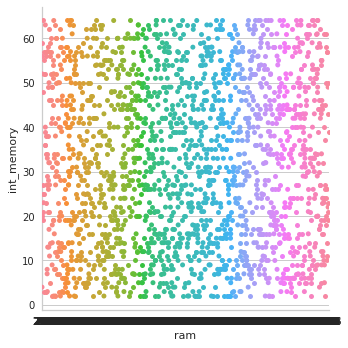

In [21]:
sns.catplot(kind='strip',data=mp,y='int_memory', x='ram');

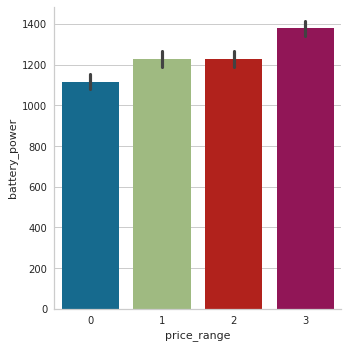

In [22]:
sns.catplot(kind='bar', data=mp, x='price_range',y='battery_power');

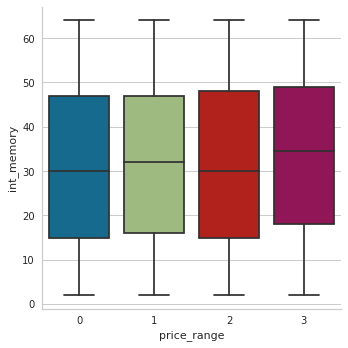

In [23]:
sns.catplot(kind='box',data=mp,x='price_range',y='int_memory');

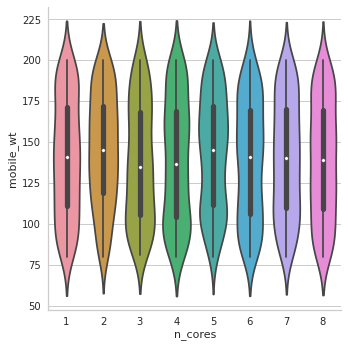

In [24]:
sns.catplot(kind='violin',data=mp, y='mobile_wt', x='n_cores');

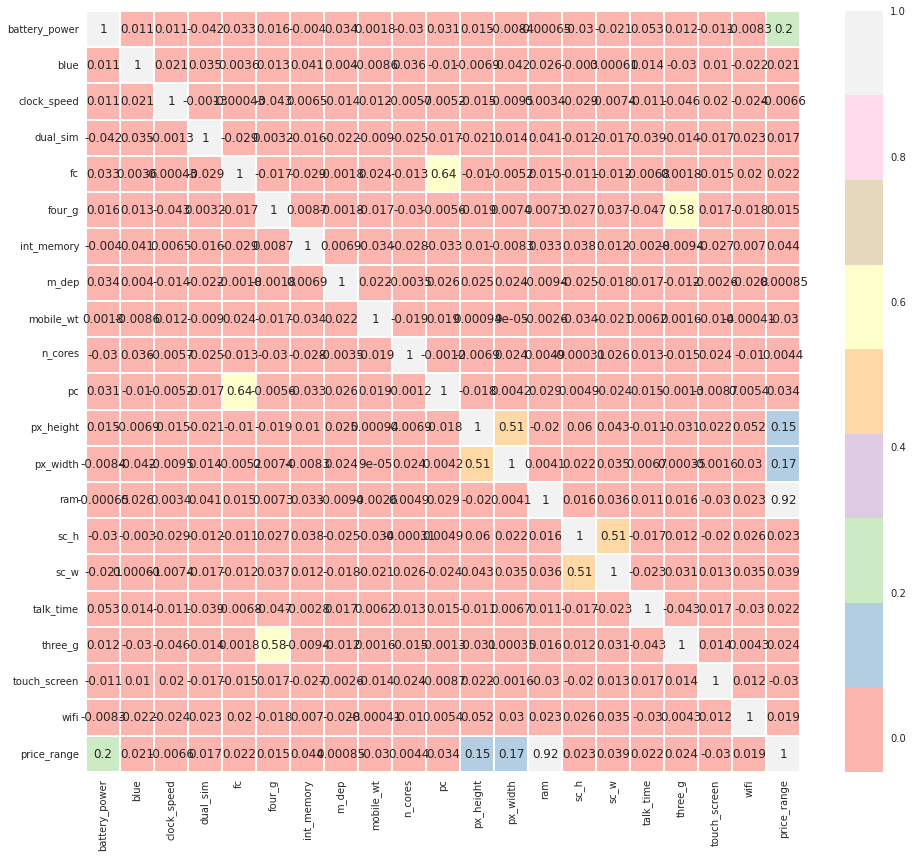

In [25]:
corr=mp.corr()
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, annot=True,linewidths=.2, ax=ax, cmap='Pastel1');

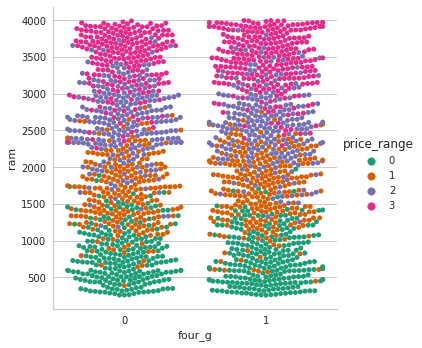

In [26]:
ax=sns.catplot(kind='swarm', data=mp, x="four_g", y="ram", hue="price_range",palette="Dark2");

In [27]:
mp.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [28]:
data=mp[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [29]:
scaler_data = StandardScaler().fit(data)

In [30]:
standard_data = scaler_data.transform(data)

In [31]:
clus_file = np.memmap('clus_mem.npy',
                      dtype='float32',
                      mode='w+',
                      shape=standard_data.shape
                      )

In [32]:
! ls -la

total 1336
drwxr-xr-x 2 root root    4096 Oct 15 05:50 .
drwxr-xr-x 6 root root    4096 Oct 15 05:43 ..
---------- 1 root root 1353930 Oct 15 05:50 __notebook__.ipynb
-rw-r--r-- 1 root root  160000 Oct 15 05:50 clus_mem.npy


In [33]:
# Now fill this file with our data:
clus_file[:]= standard_data

In [34]:
clus_file[:3]

memmap([[-0.90259725, -0.9900495 ,  0.83077943, -1.019184  , -0.7624947 ,
         -1.0439656 , -1.3806435 ,  0.34073952,  1.3492488 , -1.1019713 ,
         -1.3057501 , -1.4089485 , -1.1467841 ,  0.3917034 , -0.7849833 ,
          0.2831028 ,  1.4624933 , -1.786861  , -1.0060182 ,  0.9860966 ],
        [-0.49513856,  1.0100505 , -1.2530642 ,  0.9811771 , -0.9928904 ,
          0.957886  ,  1.1550242 ,  0.68754816, -0.12005944, -0.66476786,
         -0.6459888 ,  0.58577794,  1.7044647 ,  0.46731701,  1.1142656 ,
         -0.63531667, -0.73426723,  0.55964065,  0.9940179 , -1.0140994 ],
        [-1.5376865 ,  1.0100505 , -1.2530642 ,  0.9811771 , -0.53209895,
          0.957886  ,  0.49354568,  1.3811655 ,  0.13424392,  0.20963906,
         -0.6459888 ,  1.3926842 ,  1.0749682 ,  0.44149774, -0.31017107,
         -0.8649215 , -0.36814046,  0.55964065,  0.9940179 , -1.0140994 ]],
       dtype=float32)

In [35]:
# flush memcap file from RAM:
clus_file.flush()

In [36]:
clus_read = np.memmap(
                      'clus_mem.npy',
                      dtype='float32',
                      mode='r',
                      shape=(2000, 20)
                      )

In [37]:
clus_read.shape
print()
clus_read[:4]

(2000, 20)

memmap([[-0.90259725, -0.9900495 ,  0.83077943, -1.019184  , -0.7624947 ,
         -1.0439656 , -1.3806435 ,  0.34073952,  1.3492488 , -1.1019713 ,
         -1.3057501 , -1.4089485 , -1.1467841 ,  0.3917034 , -0.7849833 ,
          0.2831028 ,  1.4624933 , -1.786861  , -1.0060182 ,  0.9860966 ],
        [-0.49513856,  1.0100505 , -1.2530642 ,  0.9811771 , -0.9928904 ,
          0.957886  ,  1.1550242 ,  0.68754816, -0.12005944, -0.66476786,
         -0.6459888 ,  0.58577794,  1.7044647 ,  0.46731701,  1.1142656 ,
         -0.63531667, -0.73426723,  0.55964065,  0.9940179 , -1.0140994 ],
        [-1.5376865 ,  1.0100505 , -1.2530642 ,  0.9811771 , -0.53209895,
          0.957886  ,  0.49354568,  1.3811655 ,  0.13424392,  0.20963906,
         -0.6459888 ,  1.3926842 ,  1.0749682 ,  0.44149774, -0.31017107,
         -0.8649215 , -0.36814046,  0.55964065,  0.9940179 , -1.0140994 ],
        [-1.4193186 ,  1.0100505 ,  1.1985165 , -1.019184  , -0.9928904 ,
         -1.0439656 , -1.2152739 , 

In [38]:
x = np.arange(clus_read.shape[0])
x[:4]
print("")
# Shuffle 'x' in place
np.random.shuffle(x)
x[:4]

array([0, 1, 2, 3])

array([ 752, 1627,  227, 1608])

In [39]:
inertia = []
s_score = []
start = time.time()

for i in range(2,10):

    # Pick random data from memmap
    x = np.arange(clus_read.shape[0])
    np.random.shuffle(x)
    clus = clus_read[x[:1000]]

    # The model
    model = KMeans(
                    n_clusters = i,
                    max_iter = 300)
    model.fit(clus)     

    # Store inertia value
    inertia.append(model.inertia_)
    
    # Calculate silhoutte score
    t=silhouette_score(clus, model.labels_, sample_size = 1000)
    s_score.append(t)
    print()

end = time.time()
(end-start)/60  

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

0.18844100634257

In [40]:
inertia

[18606.59375,
 17581.60546875,
 17001.24609375,
 16601.40625,
 16382.9482421875,
 15986.6103515625,
 15912.12109375,
 15613.34375]

<Figure size 576x396 with 0 Axes>

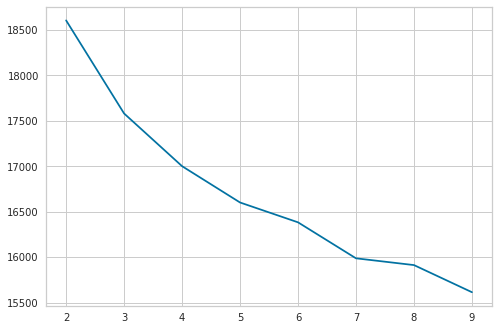

In [41]:
# Elbow plot
plt.figure()
plt.plot(range(2,10),inertia)
plt.show()

In [42]:
#Values of silhoutte score
s_score

[0.06704897,
 0.0669557,
 0.057349585,
 0.05609585,
 0.05030463,
 0.050989028,
 0.048170064,
 0.048229847]

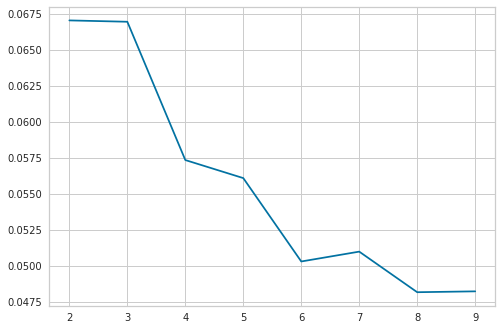

In [43]:
#Silhoutte score plot:
plt.figure();
plt.plot(range(2,10),s_score);
plt.show();

In [44]:
model = KMeans(
                n_clusters=8,
                max_iter=1000
              )

In [45]:
model.fit(clus_read)

KMeans(max_iter=1000)

In [46]:
len(model.labels_)
print()

model.inertia_
print()

2000

31844.068359375

In [47]:
# Create a new column in 'fpr' memap

clus_read = np.hstack(
                     [ clus_read,
                       model.labels_.reshape(model.labels_.shape[0],1)
                     ]
                )

# Check
clus_read.shape

(2000, 21)

In [48]:
# Shuffle data
x = np.arange(clus_read.shape[0])
np.random.shuffle(x)
clus_read = clus_read[x]

In [49]:
# Mean silhoutte score
data_size = 100000
silhouette_score(
                 clus_read[:data_size,:2],
                 model.labels_[:data_size],
                 sample_size=50000   # For calculation of silhoutte score
                 )

-0.0381026352349143

In [50]:
visualizer = SilhouetteVisualizer(
                                  model,
                                  colors='yellowbrick'
                                  )

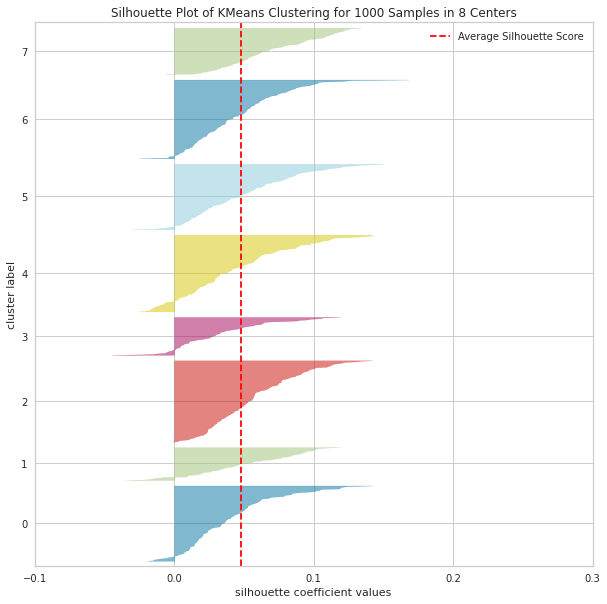

0.010814011096954346

In [51]:
fig = plt.figure(figsize= (10,10))
start = time.time()
_= visualizer.fit(clus[:10000])        # Fit the data to the visualizer
_= visualizer.show()        # Finalize and render the figure
end = time.time()
(end-start)/60

# **Classification**

In [52]:
X=mp[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [53]:
y=mp['price_range'] #this is the target

In [54]:
# Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

#  Instantiate object
ss = StandardScaler()

#  Train object on data
ss.fit(X)

#  Trandsorm data
X = ss.transform(X)

StandardScaler()

In [55]:
# Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# About train data:
                                   
X_train.shape  
print()

# Test data:

X_test.shape   
print()

(1400, 20)

(600, 20)

In [56]:
# Start modeling
# Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [57]:
# rain our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
# Make predictions of test data
y_te = ct.predict(X_test)

In [59]:
# Get accuracy:

np.sum((y_test == y_te))/y_test.size

0.8333333333333334

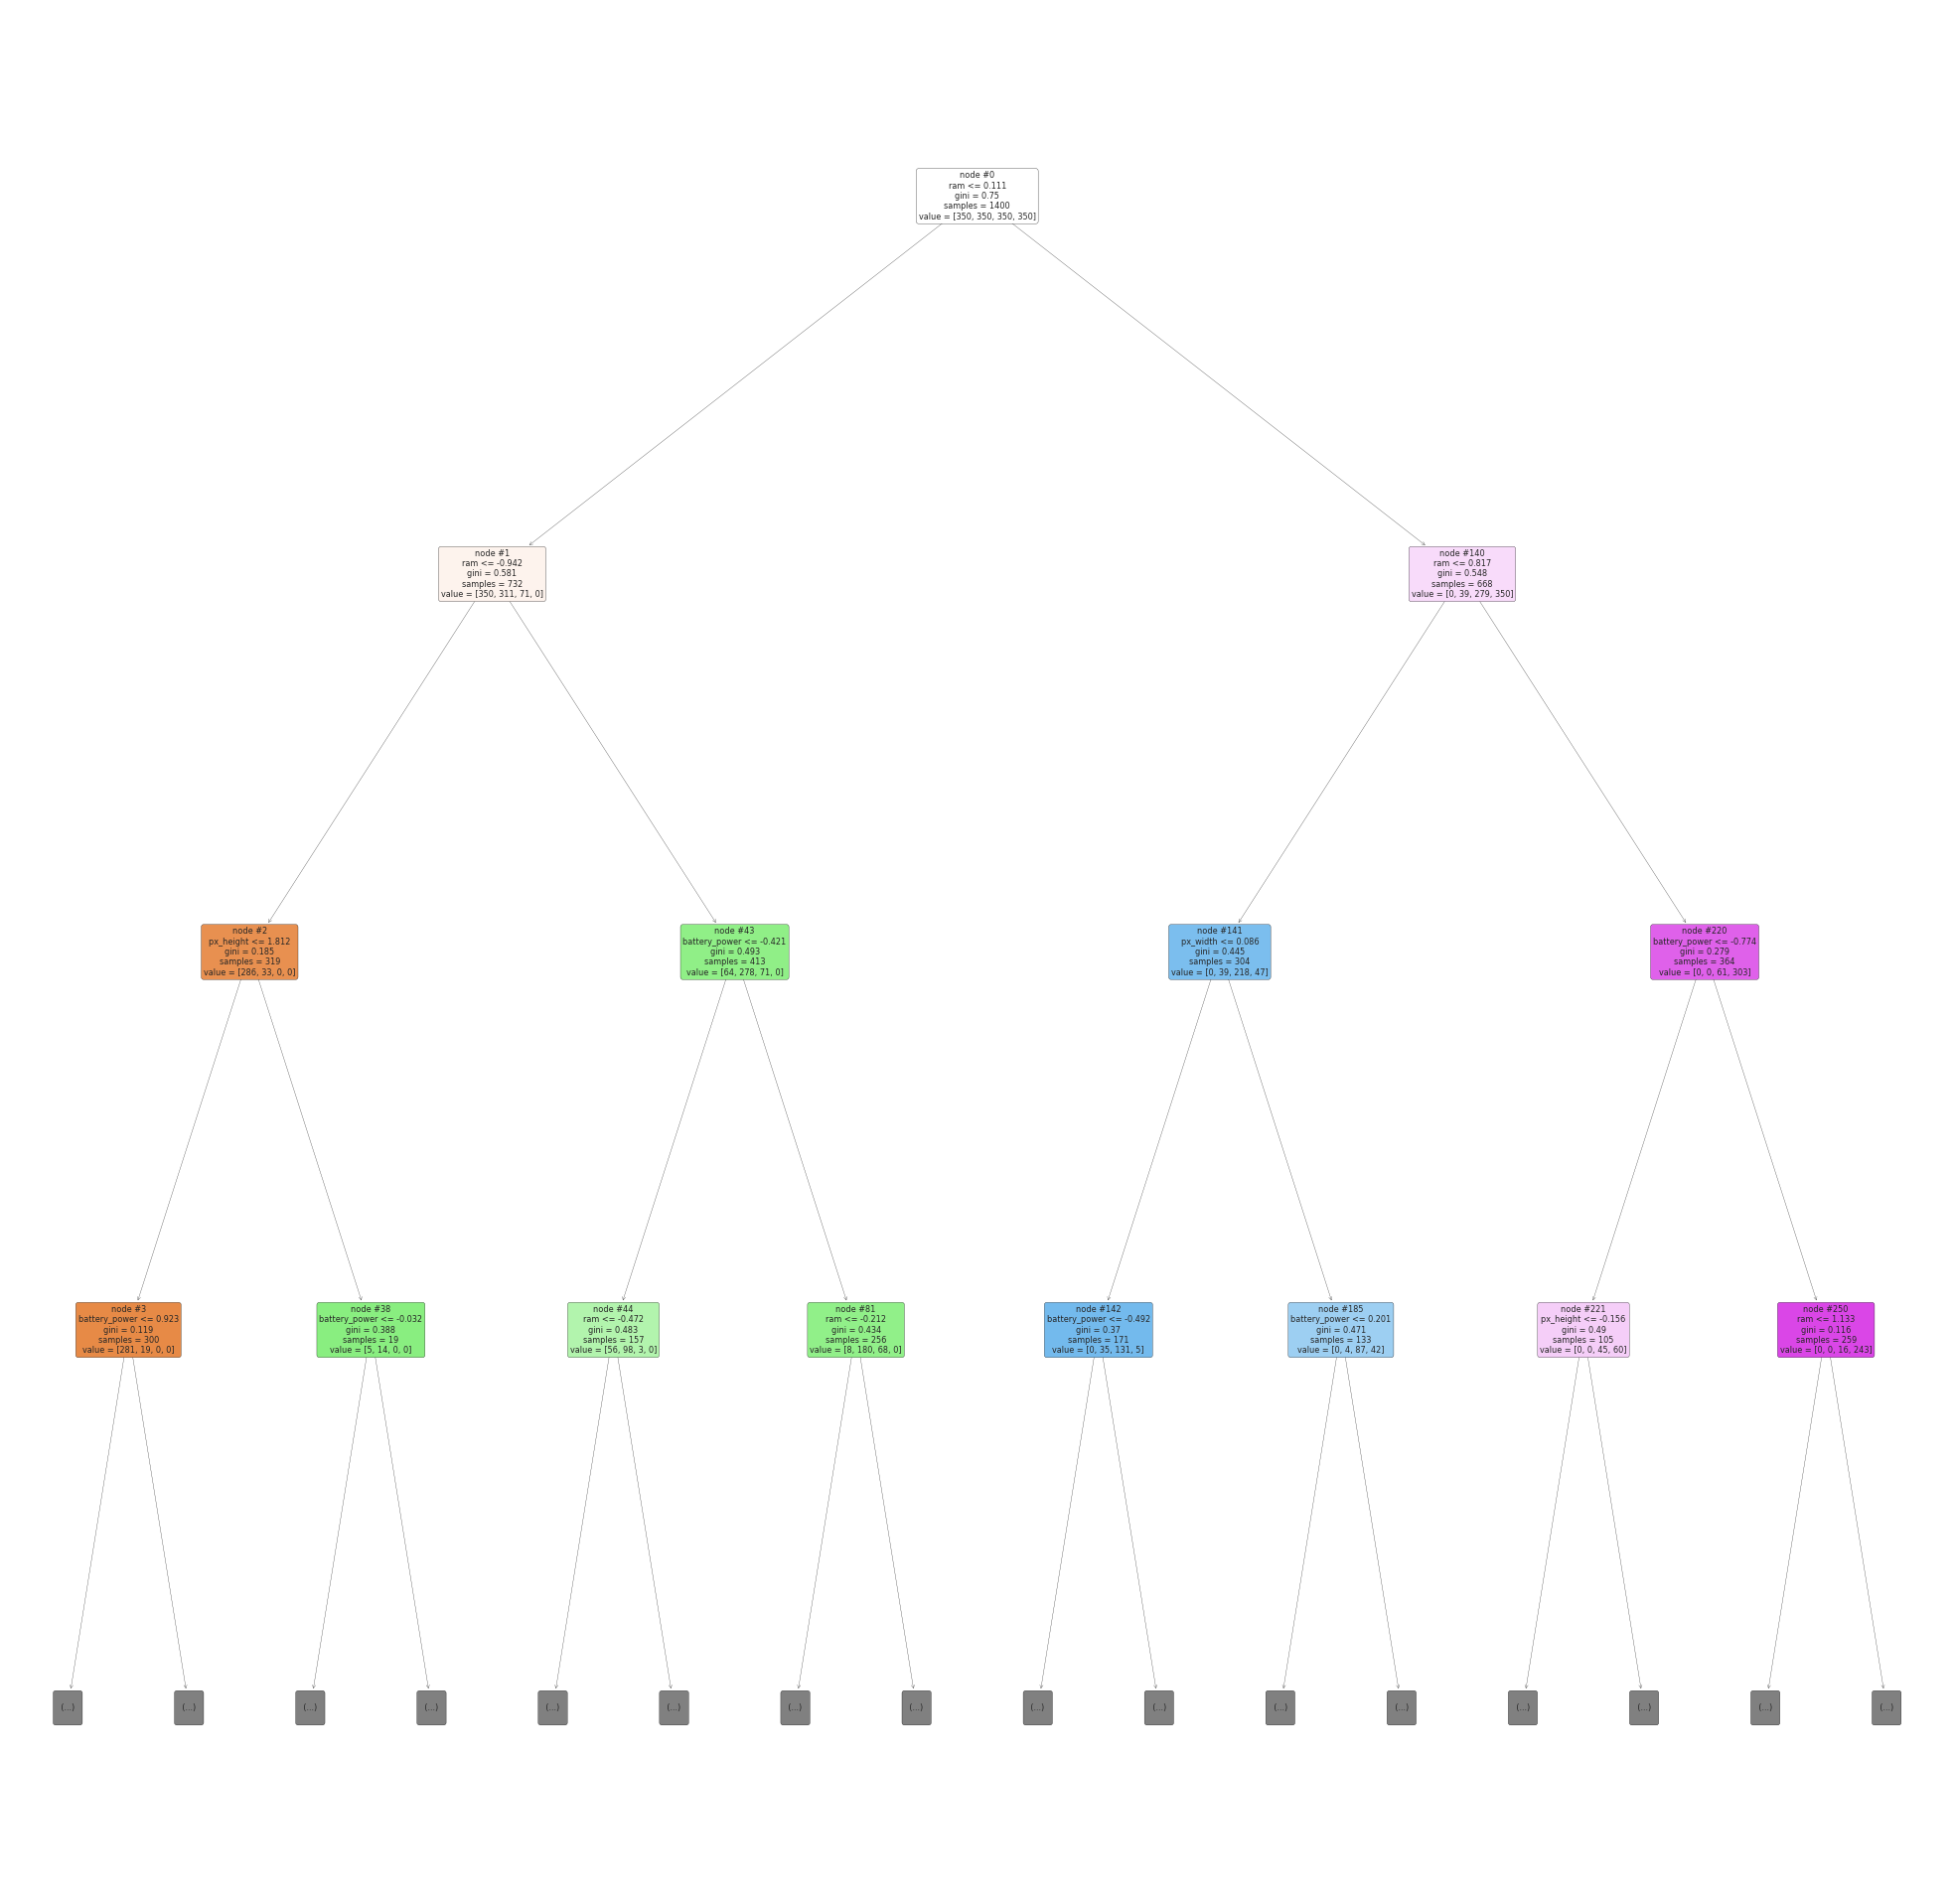

In [60]:
# Plot decision tree
_=plt.figure(figsize=(35,35))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
            )

_=plt.show()